In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer,SimpleImputer

# Reading a Data

In [2]:

train = pd.read_csv('Summer Analytics 25/Week 4/Train_Data (1).csv')
train

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,73564.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,73568.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,73576.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,73577.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,73580.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult
...,...,...,...,...,...,...,...,...,...
1961,83711.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53,Adult
1962,83712.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02,Adult
1963,83713.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41,Adult
1964,83718.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99,Adult


In [3]:
test = pd.read_csv('Summer Analytics 25/Week 4/Test_Data (1).csv')
test

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,77017.0,1.0,1.0,32.2,96.0,2.0,135.0,15.11
1,75580.0,2.0,2.0,26.3,100.0,2.0,141.0,15.26
2,73820.0,1.0,2.0,28.6,107.0,2.0,136.0,8.82
3,80489.0,2.0,1.0,22.1,93.0,2.0,111.0,12.13
4,82047.0,1.0,1.0,24.7,91.0,2.0,105.0,3.12
...,...,...,...,...,...,...,...,...
307,74150.0,2.0,2.0,21.9,82.0,2.0,82.0,2.54
308,82550.0,2.0,1.0,33.3,95.0,2.0,77.0,6.36
309,77835.0,2.0,2.0,41.5,91.0,2.0,149.0,15.52
310,79281.0,2.0,2.0,22.5,82.0,2.0,93.0,1.39


# Data Cleaning

## **1.Handling Missing Data**

In [4]:

train.isnull().sum()

SEQN         12
RIAGENDR     18
PAQ605       13
BMXBMI       18
LBXGLU       13
DIQ010       18
LBXGLT       11
LBXIN         9
age_group    14
dtype: int64

In [5]:
test.isnull().sum()

SEQN        2
RIAGENDR    2
PAQ605      1
BMXBMI      1
LBXGLU      1
DIQ010      1
LBXGLT      2
LBXIN       1
dtype: int64

In [6]:
train.drop(columns= ['SEQN'],inplace =True)
test.drop(columns= ['SEQN'],inplace =True)


## Using Imputer for the Columns

In [7]:
#Seperating the Numerical and Catogorical Columns 
Category = ['RIAGENDR','PAQ605','DIQ010']
Num = ['BMXBMI','LBXGLU','LBXGLT','LBXIN']

In [8]:
#KNN Imputer for Numerical Columns
knn = KNNImputer(n_neighbors = 5)
train_2 = knn.fit_transform(train.loc[:,Num])
train_2 = pd.DataFrame(train_2,columns = Num)
test_2 = knn.transform(test.loc[:,Num])
test_2 = pd.DataFrame(test_2,columns = Num)


In [9]:
#SImpleImputer for the Categorical Columns
si = SimpleImputer(strategy= 'most_frequent')
train_2[Category] = si.fit_transform(train.loc[:,Category])
test_2[Category] = si.transform(test.loc[:,Category])


In [10]:
train_2.shape,test_2.shape,train.shape,test.shape

((1966, 7), (312, 7), (1966, 8), (312, 7))

In [11]:
#missing Values are handled
train_2.isnull().sum()

BMXBMI      0
LBXGLU      0
LBXGLT      0
LBXIN       0
RIAGENDR    0
PAQ605      0
DIQ010      0
dtype: int64

In [12]:
#simpleImputer for all (Alternate Imputation)
si2 = SimpleImputer()
train_3 = si2.fit_transform(train.loc[:,Num])
train_3 = pd.DataFrame(train_3,columns = Num)
test_3 = si2.transform(test.loc[:,Num])
test_3 = pd.DataFrame(test_3,columns = Num)
train_3[Category] = si.transform(train.loc[:,Category])
test_3[Category] = si.transform(test.loc[:,Category])

In [13]:
train_3.isnull().sum()

BMXBMI      0
LBXGLU      0
LBXGLT      0
LBXIN       0
RIAGENDR    0
PAQ605      0
DIQ010      0
dtype: int64

In [60]:
(train['age_group'].isnull().sum()/train.shape[0])*100
#only .7 percent values are missing from Target Feature , So we removed that rows completely 

0.7121057985757884

In [15]:
#concatenate
train_2['age_group'] = train['age_group']
train_3['age_group'] = train['age_group']

In [16]:
#removing the target missing valued rows
train_3 = train_3.dropna(subset = ['age_group'])
train_2 = train_2.dropna(subset = ['age_group'])
train_2.shape,train_3.shape

((1952, 8), (1952, 8))

## 2.Handling Duplicate Columns

In [17]:
#There is no duplicate columns here..
for i in train_2.columns:
    print(train_2.drop(columns = [i]).duplicated().sum(),i)
print('Overall Duplicate Check',train_2.duplicated().sum())
for i in train_3.columns:
    print(train_3.drop(columns = [i]).duplicated().sum(),i)
print('Overall Duplicate Check',train_3.duplicated().sum())

0 BMXBMI
0 LBXGLU
0 LBXGLT
1 LBXIN
0 RIAGENDR
0 PAQ605
0 DIQ010
0 age_group
Overall Duplicate Check 0
0 BMXBMI
0 LBXGLU
0 LBXGLT
1 LBXIN
0 RIAGENDR
0 PAQ605
0 DIQ010
0 age_group
Overall Duplicate Check 0


In [18]:
#These two rows are Somewhat duplicated , but will not affect our Analysis 
train_2[train_2.drop(columns = ['LBXIN']).duplicated(keep=False)]

,BMXBMI,LBXGLU,LBXGLT,LBXIN,RIAGENDR,PAQ605,DIQ010,age_group
1378,30.7,103.0,81.0,22.46,1.0,2.0,2.0,Adult
1813,30.7,103.0,81.0,11.17,1.0,2.0,2.0,Adult


## 3.Handling the Datatypes of Columns

In [63]:
train_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1952 entries, 0 to 1965
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BMXBMI        1952 non-null   float64
 1   LBXGLU        1952 non-null   int32  
 2   LBXGLT        1952 non-null   int32  
 3   LBXIN         1952 non-null   float64
 4   RIAGENDR      1952 non-null   object 
 5   PAQ605        1952 non-null   object 
 6   DIQ010        1952 non-null   object 
 7   age_group     1952 non-null   object 
 8   Groups        1952 non-null   int64  
 9   Glucose_type  1952 non-null   float64
 10  Insulin_type  1952 non-null   float64
dtypes: float64(4), int32(2), int64(1), object(4)
memory usage: 167.8+ KB


In [61]:
#converting the columns to object 
train_2['RIAGENDR'] = train_2['RIAGENDR'].astype(object)
train_2['PAQ605'] = train_2['PAQ605'].astype(object)
train_2['DIQ010'] = train_2['DIQ010'].astype(object)

In [62]:
# converting the columns to int32 
train_2['LBXGLU'] = train_2['LBXGLU'].astype(np.int32)
train_2['LBXGLT'] = train_2['LBXGLT'].astype(np.int32)

In [64]:

for i in train_2.columns:
    print(train_2[i].value_counts().sort_index())

BMXBMI
14.5    1
14.6    1
15.3    1
15.4    2
15.7    2
       ..
60.9    1
63.0    1
67.5    1
68.6    1
70.1    1
Name: count, Length: 349, dtype: int64
LBXGLU
63     1
66     1
67     1
68     1
69     1
      ..
250    1
257    1
275    1
297    1
405    1
Name: count, Length: 95, dtype: int64
LBXGLT
40     1
41     3
44     1
45     2
46     1
      ..
411    1
427    1
459    1
473    1
604    1
Name: count, Length: 224, dtype: int64
LBXIN
0.14      1
1.02      1
1.07      1
1.13      1
1.15      1
         ..
66.24     1
69.16     1
76.99     1
79.75     1
102.29    1
Name: count, Length: 1295, dtype: int64
RIAGENDR
1.0     949
2.0    1003
Name: count, dtype: int64
PAQ605
1.0     343
2.0    1608
7.0       1
Name: count, dtype: int64
DIQ010
1.0      19
2.0    1884
3.0      49
Name: count, dtype: int64
age_group
Adult     1638
Senior     314
Name: count, dtype: int64
Groups
0    1638
1     314
Name: count, dtype: int64
Glucose_type
0.0       5
1.0    1868
2.0      79
Name: count,

# EDA


## Detecting Outliers

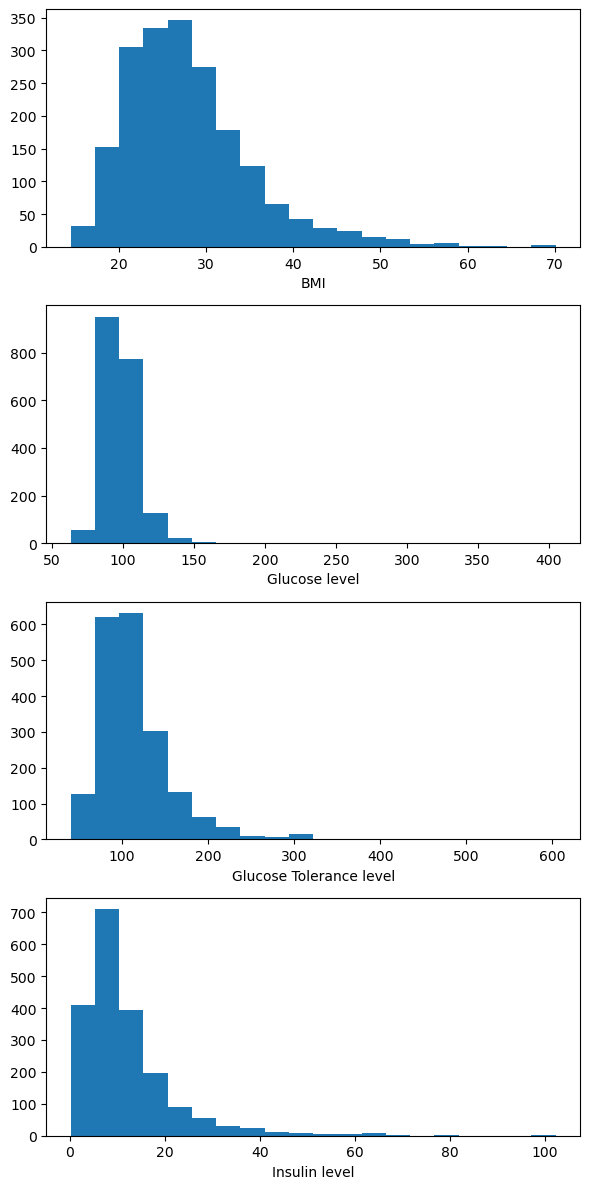

In [23]:
fig , ax = plt.subplots(nrows=4,ncols=1,figsize = (6,12))
ax[0].hist(train_2['BMXBMI'],bins =20)
ax[0].set_xlabel('BMI')
ax[1].hist(train_2['LBXGLU'],bins =20)
ax[1].set_xlabel('Glucose level')
ax[2].hist(train_2['LBXGLT'],bins =20)
ax[2].set_xlabel('Glucose Tolerance level')
ax[3].hist(train_2['LBXIN'],bins =20)
ax[3].set_xlabel('Insulin level')
plt.tight_layout()

## Eliminating Outliers

In [24]:
# outlier_max = [60 , 170,300,60]
# j=0
# for i in train_2.columns: 
#     # print(train_2[train_2[i] > outlier_max[j]].shape)
#     train_2 = train_2[train_2[i] < outlier_max[j]]
#     j+=1
#     print(train_2.shape)


## Feature Engineering


In [25]:
def groups(age):
    if age == 'Adult':
        return 0 
    else:
        return 1


In [26]:
train_3['Groups'] = train_3['age_group'].apply(groups)
train_2['Groups'] = train_2['age_group'].apply(groups)

In [27]:
#EDA
def diabates(level):
    if level < 70:
        return 'Low'
    elif level >=70 and level <125:
        return 'Normal'
    else: 
        return 'diabatic'
def insulin(level):
    if level < 2:
        return 'Low'
    elif level >=2 and level <25:
        return 'Normal'
    else: 
        return 'prediabatic'

train_2['Glucose_type'] =train_2['LBXGLU'].apply(diabates)
train_2['Insulin_type'] = train_2['LBXIN'].apply(insulin)
test_2['Glucose_type'] =test_2['LBXGLU'].apply(diabates)
test_2['Insulin_type'] = test_2['LBXIN'].apply(insulin)

In [28]:
from sklearn.preprocessing import OrdinalEncoder
oc = OrdinalEncoder(categories=[['Low', 'Normal', 'diabatic'], ['Low', 'Normal', 'prediabatic']])
train_2[['Glucose_type', 'Insulin_type']] = oc.fit_transform(train_2[['Glucose_type', 'Insulin_type']])
test_2[['Glucose_type', 'Insulin_type']] = oc.transform(test_2[['Glucose_type', 'Insulin_type']])
train_2

,BMXBMI,LBXGLU,LBXGLT,LBXIN,RIAGENDR,PAQ605,DIQ010,age_group,Groups,Glucose_type,Insulin_type
0,35.7,110.0,150.0,14.91,2.0,2.0,2.0,Adult,0,1.0,1.0
1,20.3,89.0,80.0,3.85,2.0,2.0,2.0,Adult,0,1.0,1.0
2,23.2,89.0,68.0,6.14,1.0,2.0,2.0,Adult,0,1.0,1.0
3,28.9,104.0,84.0,16.15,1.0,2.0,2.0,Adult,0,1.0,1.0
4,35.9,103.0,81.0,10.92,2.0,1.0,2.0,Adult,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1961,33.5,100.0,73.0,6.53,2.0,2.0,2.0,Adult,0,1.0,1.0
1962,30.0,93.0,208.0,13.02,1.0,2.0,2.0,Adult,0,1.0,1.0
1963,23.7,103.0,124.0,21.41,1.0,2.0,2.0,Adult,0,1.0,1.0
1964,27.4,90.0,108.0,4.99,2.0,2.0,2.0,Adult,0,1.0,1.0


In [29]:
train_2_trf = train_2.drop(columns= ['age_group','LBXIN','LBXGLU'])
test_2_trf = test_2.drop(columns= ['LBXIN','LBXGLU'])

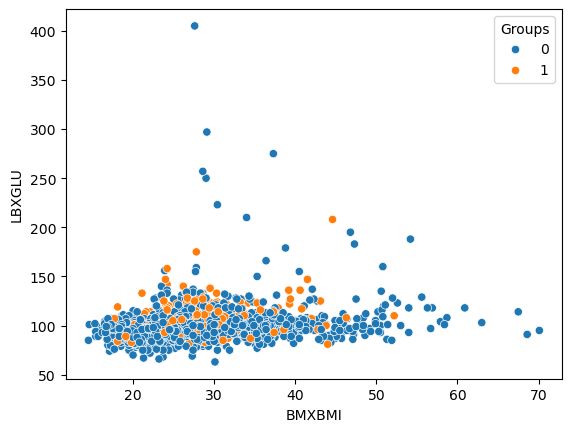

In [30]:
sns.scatterplot(data = train_2,x = 'BMXBMI',y= 'LBXGLU',hue ='Groups')
plt.show()


<Axes: xlabel='BMXBMI', ylabel='LBXGLU'>

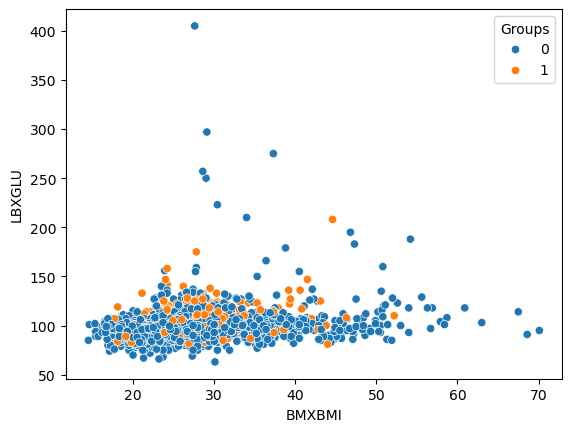

In [31]:
sns.scatterplot(data = train_3,x = 'BMXBMI',y= 'LBXGLU',hue ='Groups')


# Train_Test_Split

In [32]:
X = train_2_trf.drop(columns = ['Groups'])
Y = train_2_trf['Groups']



In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X , Y ,random_state = 63 , test_size = 0.2)


# Model Training 

In [34]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight = 'balanced',max_depth = 6 ,max_samples = 0.9, n_estimators=110, random_state=42)
model.fit(x_train, y_train)



RandomForestClassifier(class_weight='balanced', max_depth=6, max_samples=0.9,
                       n_estimators=110, random_state=42)

In [35]:
y_pred = model.predict(x_test)


In [36]:
from sklearn.metrics import confusion_matrix,f1_score,classification_report

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79       318
           1       0.32      0.59      0.42        73

    accuracy                           0.69       391
   macro avg       0.60      0.65      0.60       391
weighted avg       0.78      0.69      0.72       391



In [38]:
confusion_matrix(y_test,y_pred)

array([[228,  90],
       [ 30,  43]], dtype=int64)

In [39]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X,Y, cv=10, scoring='f1')
np.mean(scores)

0.38917799182372204

In [40]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': 0.9,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 110,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

## HyperParameter Tuning By GridSearchCV

In [41]:
md = [2,6,7,8]
ms = [0.9,0.95,0.85,1]
ne = [110,210,150]
cw = ['balanced','balanced_subsample',None]


In [42]:
param_grid = {'n_estimators' : ne,
              'max_samples' : ms,
              'max_depth':md,
             'class_weight':cw}


In [43]:
rf = RandomForestClassifier()

In [44]:
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator = rf  ,
                       param_grid = param_grid ,
                       cv =5 ,
                       verbose = 0,
                       n_jobs = -1,
                      scoring = 'f1')

In [45]:
rf_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample',
                                          None],
                         'max_depth': [2, 6, 7, 8],
                         'max_samples': [0.9, 0.95, 0.85, 1],
                         'n_estimators': [110, 210, 150]},
             scoring='f1')

In [46]:
rf_grid.best_params_

{'class_weight': 'balanced_subsample',
 'max_depth': 2,
 'max_samples': 0.95,
 'n_estimators': 150}

In [47]:
rf_grid.best_score_

0.40031482792328177

In [56]:
test_2_trf.isnull().sum()

BMXBMI          0
LBXGLT          0
RIAGENDR        0
PAQ605          0
DIQ010          0
Glucose_type    0
Insulin_type    0
dtype: int64

In [57]:
y_final = model.predict(test_2_trf)

In [59]:
y_final.shape

(312,)

In [65]:
results = pd.DataFrame({
    'age_group':y_final
})


In [66]:
results

,age_group
0,0
1,1
2,1
3,0
4,0
...,...
307,0
308,0
309,1
310,0


In [67]:
results.to_csv('submission5.csv',index=False)